# 수업 기사 크롤

In [2]:
import newspaper

link = 'https://www.edaily.co.kr/news/read?newsId=01676086632394520&mediaCodeNo=257&OutLnkChk=Y'

article = newspaper.Article(link, language = 'ko')

In [8]:
article.download()
article.parse()

In [9]:
print(article.text)

[이데일리 김정유 기자] 네이버웹툰은 네이버시리즈 독점 웹소설 ‘화산귀환’의 누적 매출이 300억원을 돌파했다고 14일 밝혔다.이는 웹소설만으로 올린 기록이다. 무협 웹소설 ‘화산귀환’은 무림의 최고수였던 ‘청명’이 어린아이로 환생해 망해버린 자신의 문파 ‘화산파’를 부활시키기 위해 고군분투하는 내용을 담았다.이 작품은 네이버시리즈에서 2019년부터 현재까지 1280여 화 이상이 넘게 연재되고 있으며 총 누적 다운로드 수 3억7000만 이상을 돌파한 인기작이다.‘화산귀환’은 네이버시리즈가 지난해 선정한 ‘시리즈 2021년 어워드: 시리즈를 빛낸 작품들’에서 웹소설 부문 전체 1위를 차지하기도 했다. 지난해 3월부터 이 작품을 원작으로 한 동명의 웹툰도 연재를 시작했다.네이버시리즈는 웹소설 작가들에게 유료화 모델을 통해 수익을 낼 수 있는 기회를 제공하고 있다. 특히 네이버시리즈와 네이버웹툰의 구매 내역이 연동돼 이용자들이 앱을 편히 사용할 수 있도록 시스템을 갖췄다. 플랫폼간 독자가 편입되는 선순환 구조를 이뤄냈다.‘화산귀환’의 비가 작가는 “연재를 시작할 때만 해도 예상조차 못 했던 곳까지 왔는데 많은 분들이 도와주셨고 긴 연재기간 동안 응원해주신 독자님들 덕분이라 생각한다”며 “네이버 시리즈의 아낌없는 지원 덕분에 더 많은 독자들과 만날 수 있었다고 생각하고 앞으로도 좋은 작품으로 보답하겠다”고 말했다.


# 과제

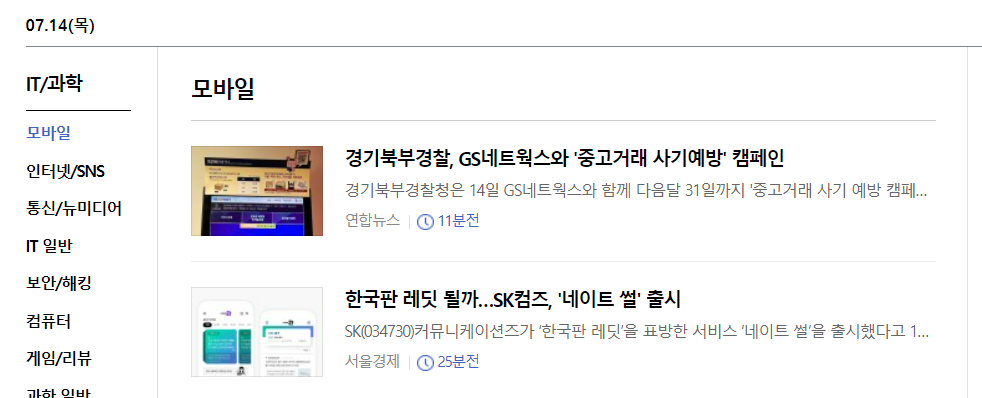

In [1]:
import requests
from bs4 import BeautifulSoup

header = {'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/103.0.0.0 Safari/537.36'}

res = requests.get('https://news.naver.com/main/list.naver?mode=LS2D&mid=shm&sid1=105&sid2=731', headers = header)
soup = BeautifulSoup(res.content, 'html.parser')


In [2]:
soup


<!DOCTYPE HTML>

<html lang="ko">
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta contents="always" name="referrer"/>
<meta content="600" http-equiv="refresh">
<meta content="width=1106" name="viewport">
<meta content="네이버 뉴스" property="og:title"/>
<meta content="website" property="og:type"/>
<meta content="https://news.naver.com/main/main.naver?mode=LS2D&amp;mid=shm&amp;sid1=100&amp;sid2=731" property="og:url"/>
<meta content="https://ssl.pstatic.net/static.news/image/news/ogtag/navernews_200x200_20160804.png" property="og:image">
<meta content="다양한 기사 정보를 제공합니다." property="og:description"/>
<meta content="네이버" property="og:article:author">
<meta content="summary" name="twitter:card"/>
<meta content="네이버 뉴스" name="twitter:title"/>
<meta content="네이버 뉴스" name="twitter:site"/>
<meta content="네이버 뉴스" name="twitter:creator"/>
<meta content="https://ssl.pstatic.net/static.news/image/news/ogtag/navernews_200x200_20160804.png" name="twitter:image"

In [7]:
ul = soup.select(".type06_headline")

In [14]:
ul.select('dt > a')

AttributeError: ResultSet object has no attribute 'select'. You're probably treating a list of elements like a single element. Did you call find_all() when you meant to call find()?

In [200]:
ul = soup.find('ul', class_='type06_headline')

url = []
for u in ul:
    if u.find('a')!=-1:
        url.append((u.find('a')['href']))
print(len(url))
url

10


['https://n.news.naver.com/mnews/article/092/0002262458?sid=105',
 'https://n.news.naver.com/mnews/article/001/0013311115?sid=105',
 'https://n.news.naver.com/mnews/article/011/0004076234?sid=105',
 'https://n.news.naver.com/mnews/article/014/0004867312?sid=105',
 'https://n.news.naver.com/mnews/article/001/0013311038?sid=105',
 'https://n.news.naver.com/mnews/article/001/0013311017?sid=105',
 'https://n.news.naver.com/mnews/article/001/0013310876?sid=105',
 'https://n.news.naver.com/mnews/article/001/0013310872?sid=105',
 'https://n.news.naver.com/mnews/article/421/0006217494?sid=105',
 'https://n.news.naver.com/mnews/article/009/0004991374?sid=105']

In [189]:
header = {'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/103.0.0.0 Safari/537.36'}

news = []

for i in range(10):
    link = url[i]
    
    article = newspaper.Article(link, language = 'ko')
    article.download()
    article.parse()

    news.append(article.text)
    

In [193]:
news[3]

'[파이낸셜뉴스] \'주 32시간제\' 등 근무 제도 혁신을 추진해 온 우아한형제들이 새로운 근무 형태를 추가 실험한다. 내년부터는 근무장소와 시간 모두 임직원이 각자 선택해서 일할 수 있게 된다는 설명이다.우아한형제들은 지난 13일 임직원 전체를 대상으로 진행한 온라인 전사발표에서 근무지 자율선택제 및 선택적 근로시간제 계획을 발표했다고 14일 밝혔다. 김범준 우아한형제들 대표는 "우리가 일을 더 잘하기 위해 자율을 기반으로 한 선택적 근무제도를 확대하기로 했다"고 강조했다.내년 1월 1일부터 도입 예정인 근무지 자율선택제는 구성원 모두가 근무 시간 중 어디서든 연결돼 업무에 몰입할 수 있는 근무 장소를 자율적으로 선택할 수 있는 내용을 골자로 한다. 사무실 출근, 재택 근무 외 제3의 장소 어디서든 근무할 수 있다는 설명이다. 다만 해외 등 시차가 있는 곳에선 한국시간 기준 \'코웍(co-work) 타임\'을 포함한 본인의 근무시간을 준수하면 된다. 코웍 타임은 구성원 간 원활한 업무 소통을 위해 필수로 근무해야 하는 시간을 의미한다.근무 시간도 자율적으로 선택할 수 있게 된다. 올 초 도입된 \'개인별 시차출퇴근제\'에서 더 나아가 내년부터는 유연근무제의 일환인 \'선택적 근로시간제\'를 도입하기로 하면서다. 기존 하루 7시간(월요일은 4시간), 주 32시간 기준에서 월 단위 총 근무시간 내 개인의 업무 스케줄과 컨디션 등에 따라 자율적으로 업무 시간을 분배하는 방식이다.올해 연말까지는 지난달부터 적용 중인 주1회 사무실 출근을 유지할 예정이다.앞서 우아한형제들은 새로운 근무제를 선도적으로 도입해 왔다. 2015년 1월에는 월요일 오후 1시에 출근하는 주 4.5일제를 도입, 2017년 3월 주 37.5시간에서 2시간30분을 단축한 주 35시간을 안착시켰다.2018년 4월 포괄임금제를 폐지, 같은 해 7월에는 유연한 근무형태를 위해 부서별 시차출퇴근제도를 도입했다. 올해 1월에는 주 32시간제를 도입한 데 이어 개인별 시차출퇴근제도 적용해 시행 중이다.우아

# 또 다른 방법

In [194]:
import requests
from bs4 import BeautifulSoup

header = {'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/103.0.0.0 Safari/537.36'}

res = requests.get('https://news.naver.com/main/list.naver?mode=LS2D&mid=shm&sid1=105&sid2=731', headers = header)
soup = BeautifulSoup(res.content, 'html.parser')


In [195]:
result = soup.select('dt.photo')